In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
AA3to1 = {'CYS': 'C', 'ASP': 'D', 'SER': 'S', 'GLN': 'Q', 'LYS': 'K','ILE': 'I', 'PRO': 'P', 'THR': 'T', 'PHE': 'F', 'ASN': 'N', 
     'GLY': 'G', 'HIS': 'H', 'LEU': 'L', 'ARG': 'R', 'TRP': 'W','ALA': 'A', 'VAL':'V', 'GLU': 'E', 'TYR': 'Y', 'MET': 'M'}
AA1to3 = {}
for i in range(len(list(AA3to1.keys()))):
    AA1to3[list(AA3to1.values())[i]] = list(AA3to1.keys())[i]

In [3]:
AA = 'SSGLVPRGSHMRGPNPTAASLEASAGPFTVRSFTVSRPSGYGAGTVYYPTNAGGTVGAIAIVPGYTARQSSIKWWGPRLASHGFVVITIDTNSTLDQPSSRSSQQMAALRQVASLNGTSSSPIYGKVDTARMGVMGWSMGGGGSLISAANNPSLKAAAPQAPWDSSTNFSSVTVPTLIFACENDSIAPVNSSALPIYDSMSRNAKQFLEINGGSHSCANSGNSNQALIGKKGVAWMKRFMDNDTRYSTFACENPNSTRVSDFRTANCSLEDPAANKARKEAELAAATAEQ'
Am = list(AA)
Am3 = []
for i in range(len(Am)):
    Am3.append(AA1to3[Am[i]])

In [4]:
CodonDict={'ATT':'I',   'ATC':'I',  'ATA':'I',  'CTT':'L',  'CTC':'L',  
'CTA':'L',  'CTG':'L',  'TTA':'L',  'TTG':'L',  'GTT':'V',  'GTC':'V',  
'GTA':'V',  'GTG':'V',  'TTT':'F',  'TTC':'F',  'ATG':'M',  'TGT':'C',  
'TGC':'C',  'GCT':'A',  'GCC':'A',  'GCA':'A',  'GCG':'A',  'GGT':'G',  
'GGC':'G',  'GGA':'G',  'GGG':'G',  'CCT':'P',  'CCC':'P',  'CCA':'P',  
'CCG':'P',  'ACT':'T',  'ACC':'T',  'ACA':'T',  'ACG':'T',  'TCT':'S',  
'TCC':'S',  'TCA':'S',  'TCG':'S',  'AGT':'S',  'AGC':'S',  'TAT':'Y',  
'TAC':'Y',  'TGG':'W',  'CAA':'Q',  'CAG':'Q',  'AAT':'N',  'AAC':'N',  
'CAT':'H',  'CAC':'H',  'GAA':'E',  'GAG':'E',  'GAT':'D',  'GAC':'D',  
'AAA':'K',  'AAG':'K',  'CGT':'R',  'CGC':'R',  'CGA':'R',  'CGG':'R',  
'AGA':'R',  'AGG':'R',  'TAA':'X',  'TAG':'X',  'TGA':'X'}

In [5]:
AAtoGEN = {}
for i in range(len(list(CodonDict.keys()))):
    AAtoGEN[list(CodonDict.values())[i]] = list(CodonDict.keys())[i]

In [6]:
Gen = []
for i in range(len(Am)):
    Gen.append(AAtoGEN[Am[i]])

In [7]:
Gen = np.array(Gen)

In [8]:
Gen

array(['AGC', 'AGC', 'GGG', 'TTG', 'GTG', 'CCG', 'AGG', 'GGG', 'AGC',
       'CAC', 'ATG', 'AGG', 'GGG', 'CCG', 'AAC', 'CCG', 'ACG', 'GCG',
       'GCG', 'AGC', 'TTG', 'GAG', 'GCG', 'AGC', 'GCG', 'GGG', 'CCG',
       'TTC', 'ACG', 'GTG', 'AGG', 'AGC', 'TTC', 'ACG', 'GTG', 'AGC',
       'AGG', 'CCG', 'AGC', 'GGG', 'TAC', 'GGG', 'GCG', 'GGG', 'ACG',
       'GTG', 'TAC', 'TAC', 'CCG', 'ACG', 'AAC', 'GCG', 'GGG', 'GGG',
       'ACG', 'GTG', 'GGG', 'GCG', 'ATA', 'GCG', 'ATA', 'GTG', 'CCG',
       'GGG', 'TAC', 'ACG', 'GCG', 'AGG', 'CAG', 'AGC', 'AGC', 'ATA',
       'AAG', 'TGG', 'TGG', 'GGG', 'CCG', 'AGG', 'TTG', 'GCG', 'AGC',
       'CAC', 'GGG', 'TTC', 'GTG', 'GTG', 'ATA', 'ACG', 'ATA', 'GAC',
       'ACG', 'AAC', 'AGC', 'ACG', 'TTG', 'GAC', 'CAG', 'CCG', 'AGC',
       'AGC', 'AGG', 'AGC', 'AGC', 'CAG', 'CAG', 'ATG', 'GCG', 'GCG',
       'TTG', 'AGG', 'CAG', 'GTG', 'GCG', 'AGC', 'TTG', 'AAC', 'GGG',
       'ACG', 'AGC', 'AGC', 'AGC', 'CCG', 'ATA', 'TAC', 'GGG', 'AAG',
       'GTG', 'GAC',

Gillespi

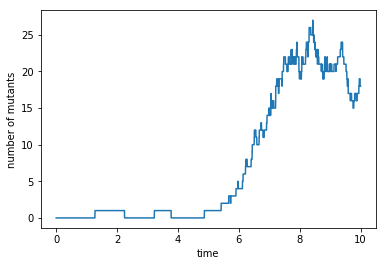

In [9]:
n_0 = 20
n_max = 10000
t = [0]
pob = [0 for i in range(n_0)]
n_mu = [0]
t_mu = [0]
j=0
f=0
i=1
while(True):
    g = 2.0*len(pob)
    ga = len(pob)
    mu = g * 0.001 + pob.count(1) * f
    s = g + ga + mu
    t_new = -1/s * np.log(np.random.random())
    t.append(t[i-1]+t_new)
    
    alpha = np.random.random()
    if(g > alpha * s and len(pob)<=n_max):
        pob.append(0)
    if(ga > alpha * s):
        idx = np.random.randint(len(pob))
        pob.pop(idx)
    if(mu > alpha * s):
        pob.append(1)
    n_mu.append(pob.count(1)) 
    if(pob.count(1)>100 or t[i]>10):
        break
    i+=1
     
plt.plot(t,n_mu) 
plt.xlabel('time')
plt.ylabel('number of mutants')
plt.show()   

In [16]:
def mutation(gen):
    g = ''.join(gen)
    idx = np.random.randint(len(g))
    a = ['A','T','G','C']
    i = np.random.randint(4)
    d = list(g)
    d[idx] = a[i]
    return ''.join(d)

In [24]:
mutation(Gen)

'AGCAGCGGGTTGGTGCCGAGGGGGAGCCACATGAGGGGGCCGAACCCGACGGCGGCGAGCTTGGAGGCGAGCGCGGGGCCGTTCACGGTGAGGAGCTTCACGGTGAGCAGGCCGAGCGGGTACGGGGCGGGGACGGTGTACTACCCGACGAACGCGGGGGGGACGGTGGGGGCGATAGCGATAGTGCCGGGGTACACGGCGAGGCAGAGCAGCATAAAGTGGTGGGGGCCGAGGTTGGCGAGCCACGGGTTCGTGGTGATAACGATAGACACGAACAGCGCGTTGGACCAGCCGAGCAGCAGGAGCAGCCAGCAGATGGCGGCGTTGAGGCAGGTGGCGAGCTTGAACGGGACGAGCAGCAGCCCGATATACGGGAAGGTGGACACGGCGAGGATGGGGGTGATGGGGTGGAGCATGGGGGGGGGGGGGAGCTTGATAAGCGCGGCGAACAACCCGAGCTTGAAGGCGGCGGCGCCGCAGGCGCCGTGGGACAGCAGCACGAACTTCAGCAGCGTGACGGTGCCGACGTTGATATTCGCGTGCGAGAACGACAGCATAGCGCCGGTGAACAGCAGCGCGTTGCCGATATACGACAGCATGAGCAGGAACGCGAAGCAGTTCTTGGAGATAAACGGGGGGAGCCACAGCTGCGCGAACAGCGGGAACAGCAACCAGGCGTTGATAGGGAAGAAGGGGGTGGCGTGGATGAAGAGGTTCATGGACAACGACACGAGGTACAGCACGTTCGCGTGCGAGAACCCGAACAGCACGAGGGTGAGCGACTTCAGGACGGCGAACTGCAGCTTGGAGGACCCGGCGGCGAACAAGGCGAGGAAGGAGGCGGAGTTGGCGGCGGCGACGGCGGAGCAG'